Combined Accuracy table:
            Model  Combined Accuracy (R-squared)
0  Bayesian Ridge                       0.969549
1             KNN                       0.895677


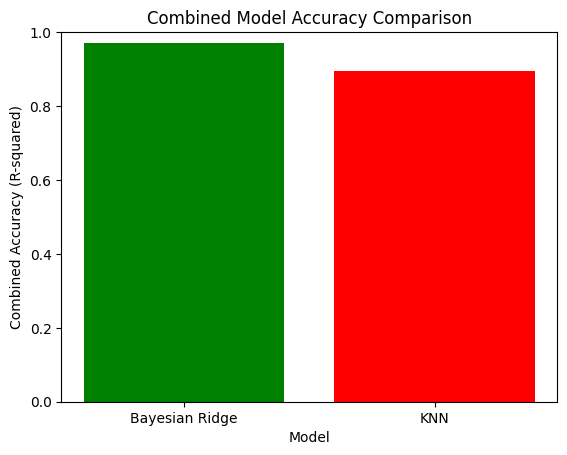

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
import warnings

# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Load the dataset
file_path = r"C:\Users\bpava\Downloads\amazon.csv\amazon.csv"
df = pd.read_csv(file_path)

# Extracting relevant columns for analysis
selected_columns = ['discounted_price', 'actual_price']
df = df[selected_columns]

# Handling missing values
df = df.dropna()

# Preprocessing: Convert '₹' to numerical values
df['discounted_price'] = df['discounted_price'].replace('[\₹,]', '', regex=True).astype(float)
df['actual_price'] = df['actual_price'].replace('[\₹,]', '', regex=True).astype(float)

# Subset of data (rows 100 to 600)
df_subset = df.iloc[100:601, :]

# Features and target variable
X = df_subset.drop('actual_price', axis=1)
y_actual = df_subset['actual_price']
y_discounted = df_subset['discounted_price']

# Split the data into training and testing sets
X_train, X_test, y_train_actual, y_test_actual, y_train_discounted, y_test_discounted = train_test_split(
    X, y_actual, y_discounted, test_size=0.2, random_state=21)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Bayesian Ridge model for actual_price
bayesian_model_actual = BayesianRidge()
bayesian_model_actual.fit(X_train_scaled, y_train_actual)
y_pred_bayesian_actual = bayesian_model_actual.predict(X_test_scaled)
r2_bayesian_actual = r2_score(y_test_actual, y_pred_bayesian_actual)

# Bayesian Ridge model for discounted_price
bayesian_model_discounted = BayesianRidge()
bayesian_model_discounted.fit(X_train_scaled, y_train_discounted)
y_pred_bayesian_discounted = bayesian_model_discounted.predict(X_test_scaled)
r2_bayesian_discounted = r2_score(y_test_discounted, y_pred_bayesian_discounted)

# KNN model for actual_price
knn_model_actual = KNeighborsRegressor()
knn_model_actual.fit(X_train_scaled, y_train_actual)
y_pred_knn_actual = knn_model_actual.predict(X_test_scaled)
r2_knn_actual = r2_score(y_test_actual, y_pred_knn_actual)

# KNN model for discounted_price
knn_model_discounted = KNeighborsRegressor()
knn_model_discounted.fit(X_train_scaled, y_train_discounted)
y_pred_knn_discounted = knn_model_discounted.predict(X_test_scaled)
r2_knn_discounted = r2_score(y_test_discounted, y_pred_knn_discounted)

# Combine the R-squared values
combined_r2_bayesian = (r2_bayesian_actual + r2_bayesian_discounted) / 2
combined_r2_knn = (r2_knn_actual + r2_knn_discounted) / 2

# Create a table for combined attributes
data_combined = {'Model': ['Bayesian Ridge', 'KNN'],
                 'Combined Accuracy (R-squared)': [combined_r2_bayesian, combined_r2_knn]}
accuracy_table_combined = pd.DataFrame(data_combined)
print("Combined Accuracy table:")
print(accuracy_table_combined)

# Bar graph for comparison
models = ['Bayesian Ridge', 'KNN']
combined_accuracies = [combined_r2_bayesian, combined_r2_knn]

plt.bar(models, combined_accuracies, color=['green', 'red'])
plt.xlabel('Model')
plt.ylabel('Combined Accuracy (R-squared)')
plt.title('Combined Model Accuracy Comparison')
plt.ylim(0, 1)
plt.show()
